In [128]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import lightgbm as lgb
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [129]:
print((2151264689 % 16) + 1)
print((2151264689 % 16) + 2)
print((2151264689 % 16) + 3)

2
3
4


In [130]:
df = pd.read_csv("../data/dataTH1.csv", encoding='latin-1', sep=";")

In [131]:
df.head()

,Date,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [155]:
data=df.iloc[:, [0,2151264689 % 16 + 1, 2151264689 % 16 +2, 2151264689 % 16 +3]]
data.head()

,Date,2,3,4
0,01/01/2021,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0
4,01/05/2021,1061.5,1061.5,1061.5


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    365 non-null    object 
 1   2       365 non-null    float64
 2   3       365 non-null    float64
 3   4       365 non-null    float64
dtypes: float64(3), object(1)
memory usage: 11.5+ KB


## EDA


In [134]:
print(data.describe())

                 2            3            4
count   365.000000   365.000000   365.000000
mean   1040.230685  1040.229041  1040.228219
std     105.145625   105.146791   105.147113
min     885.700000   885.700000   885.700000
25%     988.400000   988.400000   988.400000
50%    1022.600000  1022.600000  1022.600000
75%    1061.500000  1061.500000  1061.500000
max    1565.500000  1565.500000  1565.500000


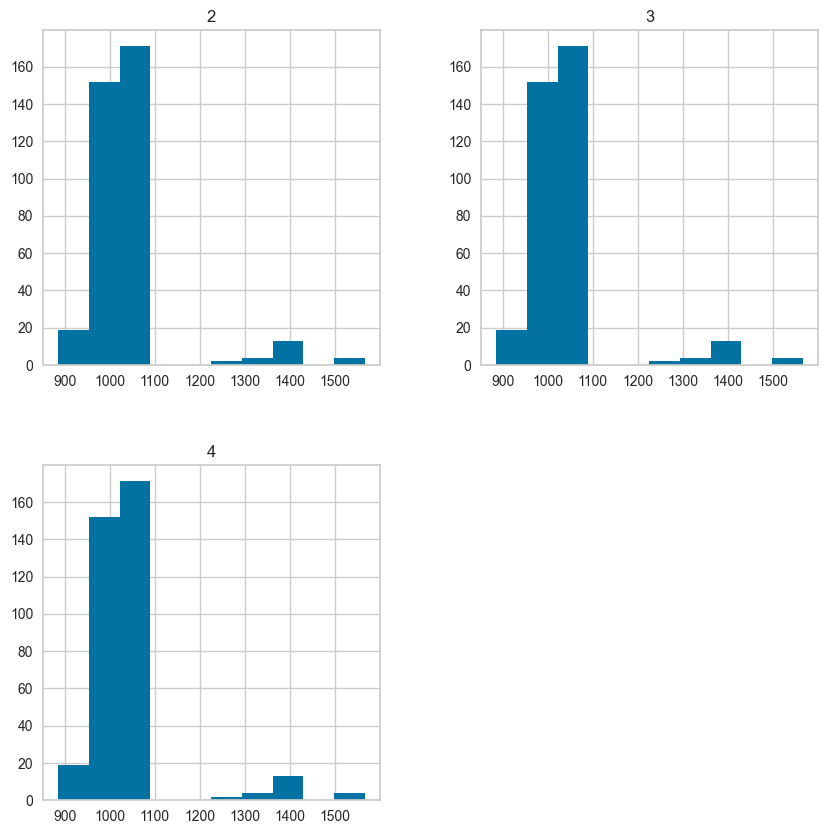

In [135]:
# Kiểm tra phân bố của các biến số
data.hist(figsize=(10,10))
plt.show()

In [136]:
# Chuyển đổi cột 'date' sang datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Trích xuất ngày, tháng, năm
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

# Chuyển đổi sang định dạng số float nếu cần thiết
data['day'] = data['day'].astype(float)
data['month'] = data['month'].astype(float)
data['year'] = data['year'].astype(float)

In [137]:
# Phân tích mối quan hệ giữa các biến
correlation = data.corr()
print(correlation)

           Date         2         3         4       day     month  year
Date   1.000000  0.151994  0.151978  0.151974  0.095131  0.996504   NaN
2      0.151994  1.000000  1.000000  1.000000  0.097228  0.145880   NaN
3      0.151978  1.000000  1.000000  1.000000  0.097219  0.145864   NaN
4      0.151974  1.000000  1.000000  1.000000  0.097216  0.145861   NaN
day    0.095131  0.097228  0.097219  0.097216  1.000000  0.011893   NaN
month  0.996504  0.145880  0.145864  0.145861  0.011893  1.000000   NaN
year        NaN       NaN       NaN       NaN       NaN       NaN   NaN


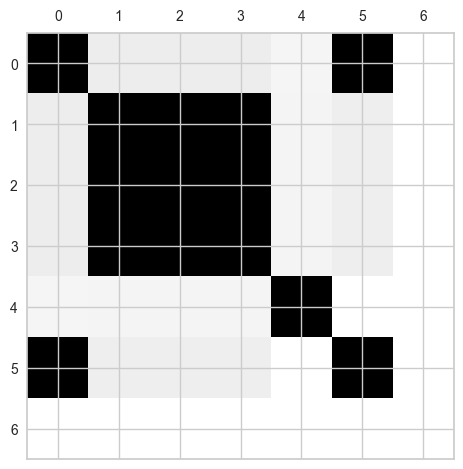

In [138]:
# Tạo biểu đồ tương quan
plt.matshow(correlation)
plt.show()

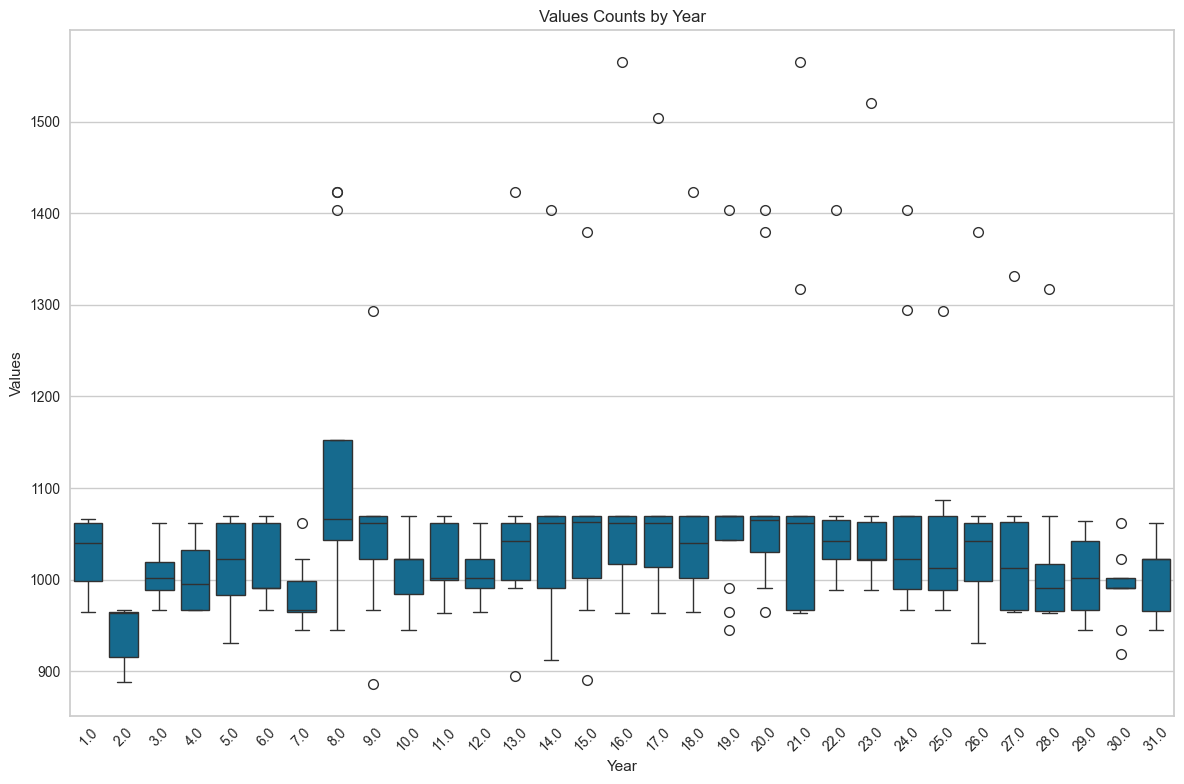

In [139]:
plt.figure(figsize=(12,8),  facecolor='white')
 
sns.boxplot(x='day', y='2', data=data)
plt.xticks(rotation=45)
plt.title('Values Counts by Year')
plt.xlabel('Year')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

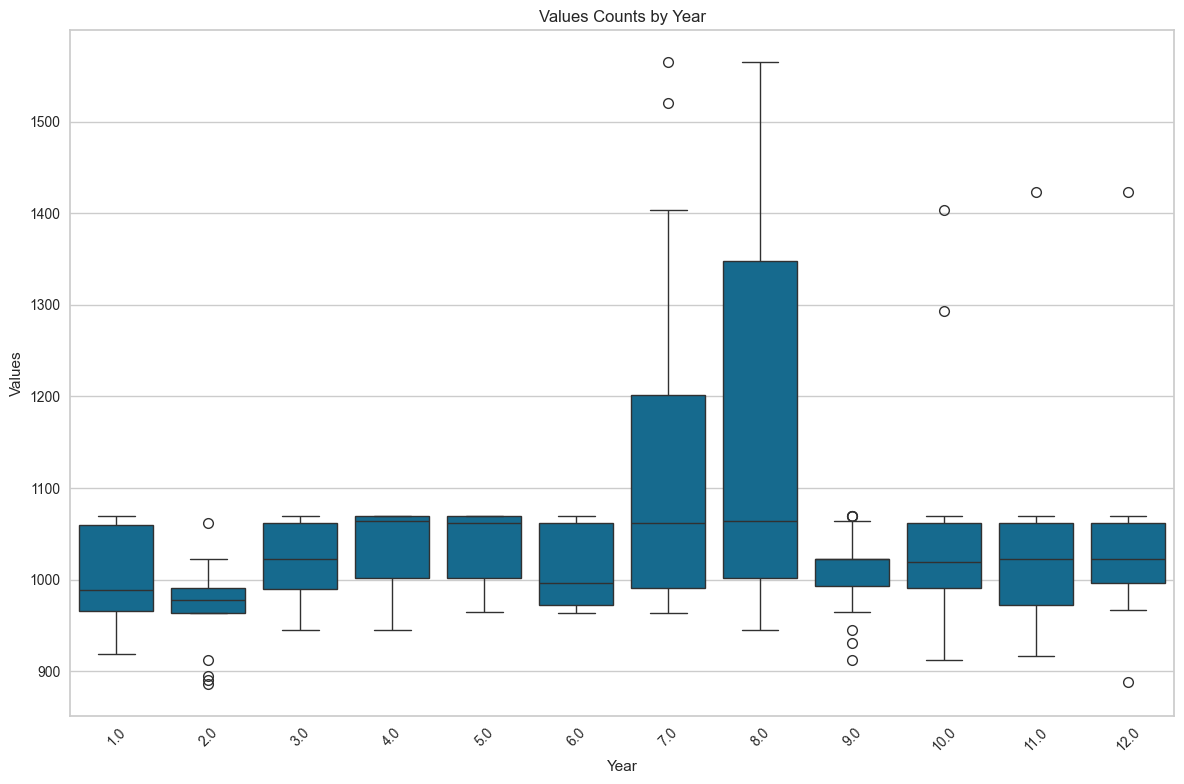

In [140]:
plt.figure(figsize=(12,8),  facecolor='white')
 
sns.boxplot(x='month', y='3', data=data)
plt.xticks(rotation=45)
plt.title('Values Counts by Year')
plt.xlabel('Year')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

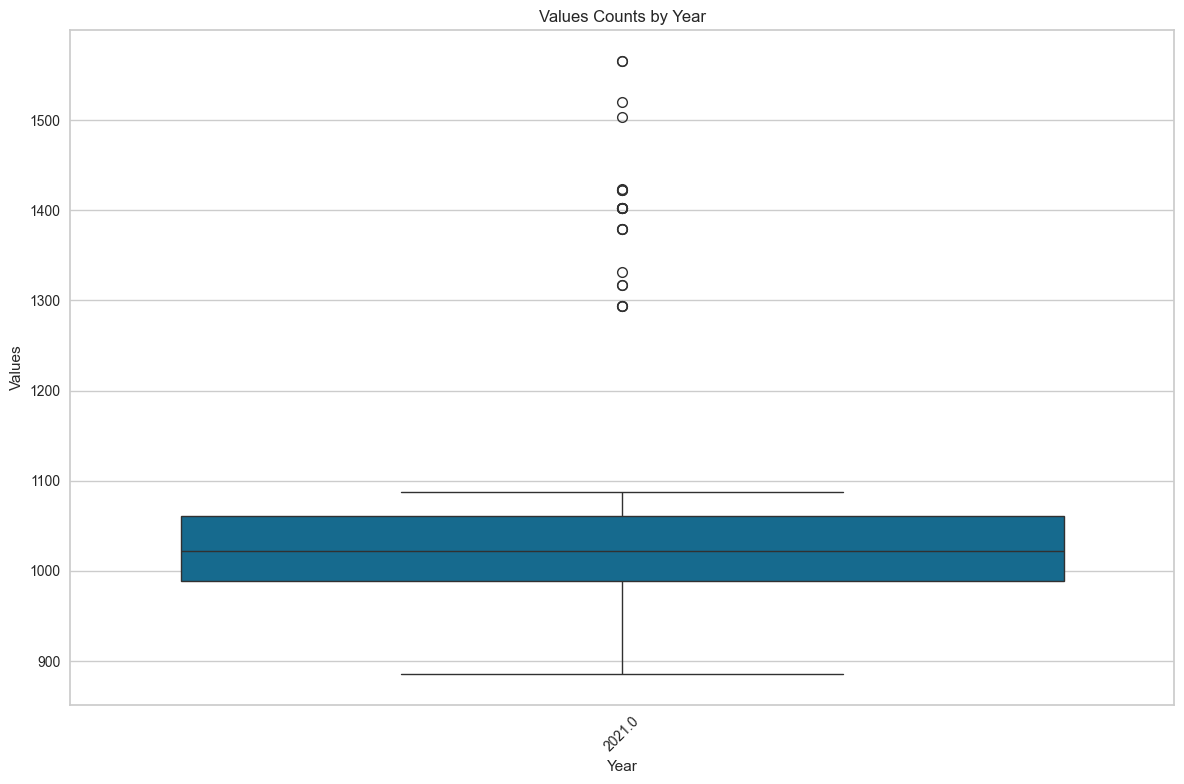

In [141]:
plt.figure(figsize=(12,8),  facecolor='white')
 
sns.boxplot(x='year', y='4', data=data)
plt.xticks(rotation=45)
plt.title('Values Counts by Year')
plt.xlabel('Year')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

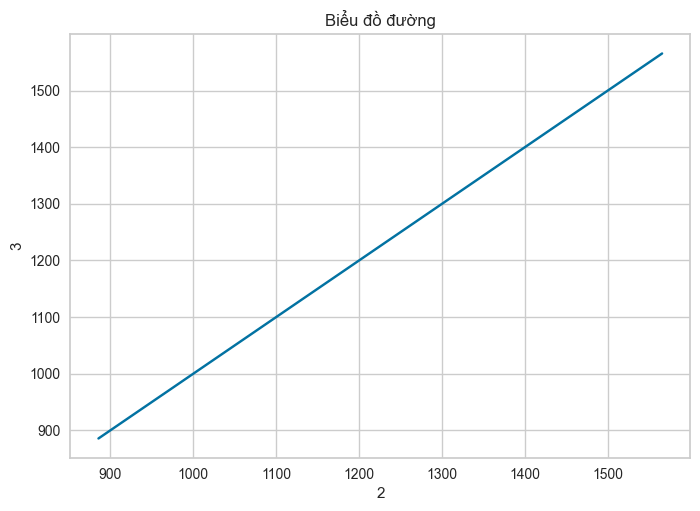

In [142]:
# Tạo biểu đồ Đường
days1='2'
days2='3'
days3='4'
sns.lineplot(
    x = days1,
    y = days2,
    data=data
)
plt.title('Biểu đồ đường')
plt.show()

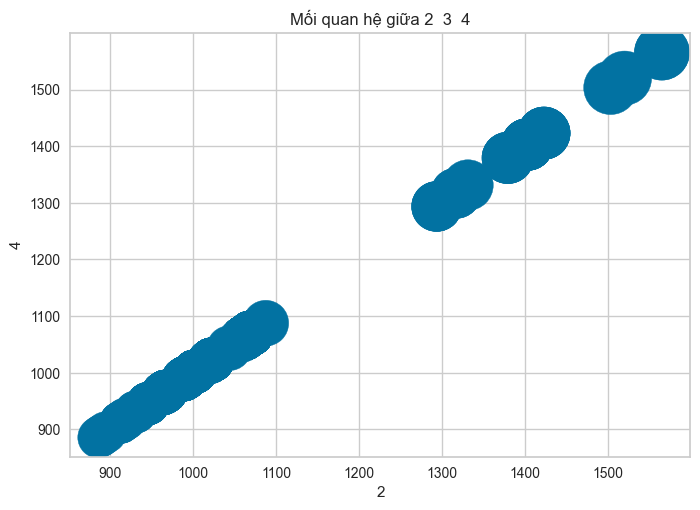

In [143]:
# Tạo biểu đồ Scatter
plt.scatter(data[days1], data[days2], data[days3])
plt.xlabel(days1)
plt.ylabel(days2)
plt.ylabel(days3)
plt.title(f'Mối quan hệ giữa {days1}  {days2}  {days3}')
plt.show()

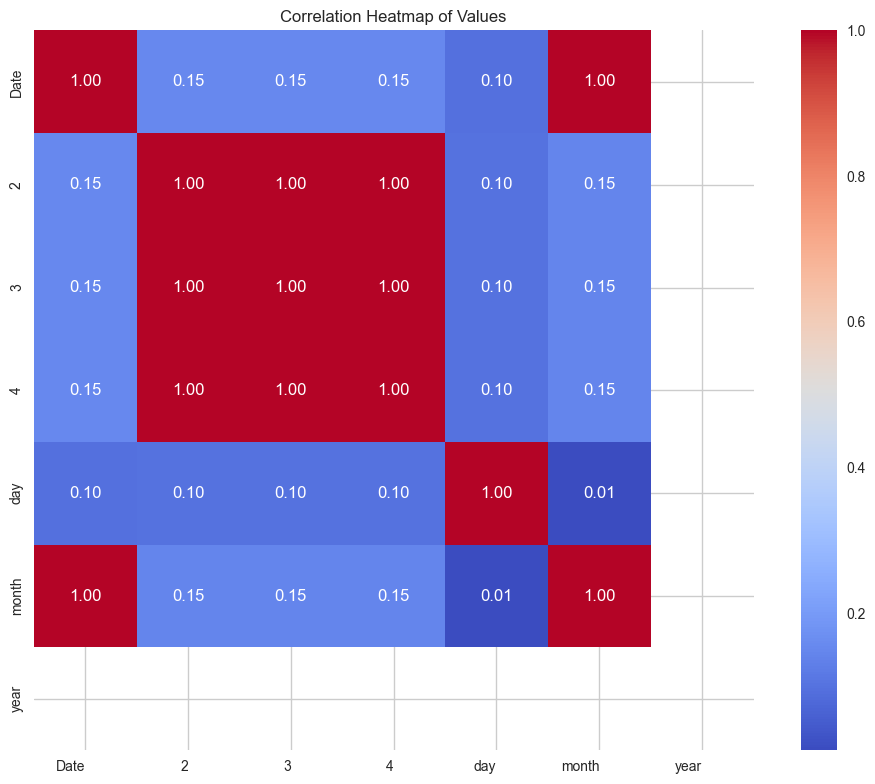

In [144]:
# Biểu đồ headmap
# Tính ma trận tương quan
corr = data.corr()

# Tạo bản đồ nhiệt
plt.figure(figsize=(10,8), facecolor='white')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Values')
plt.xticks( ha='right')
plt.yticks()
plt.tight_layout()
plt.show()

## Kalman


Dự báo điểm tiếp theo cho cột 2: 1022.4350275962843


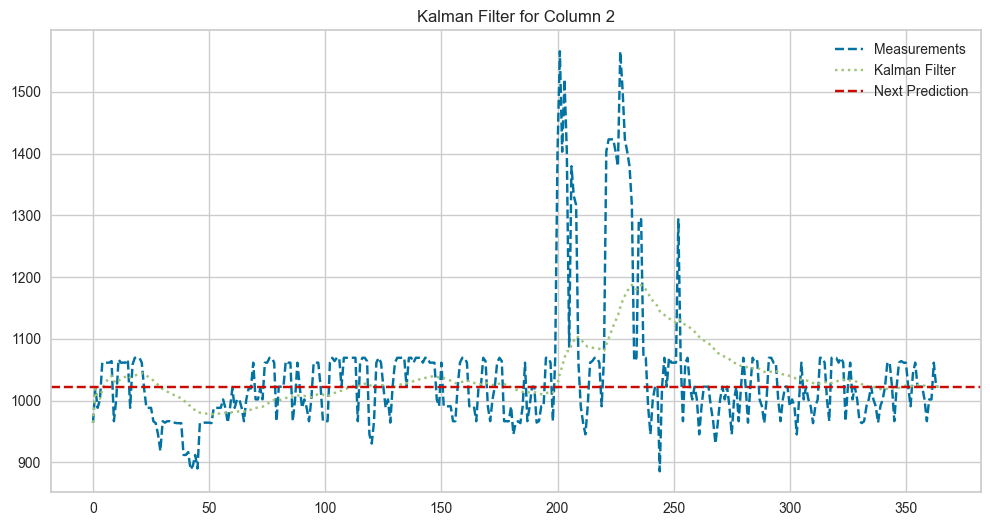

Dự báo điểm tiếp theo cho cột 3: 1022.4350275962843


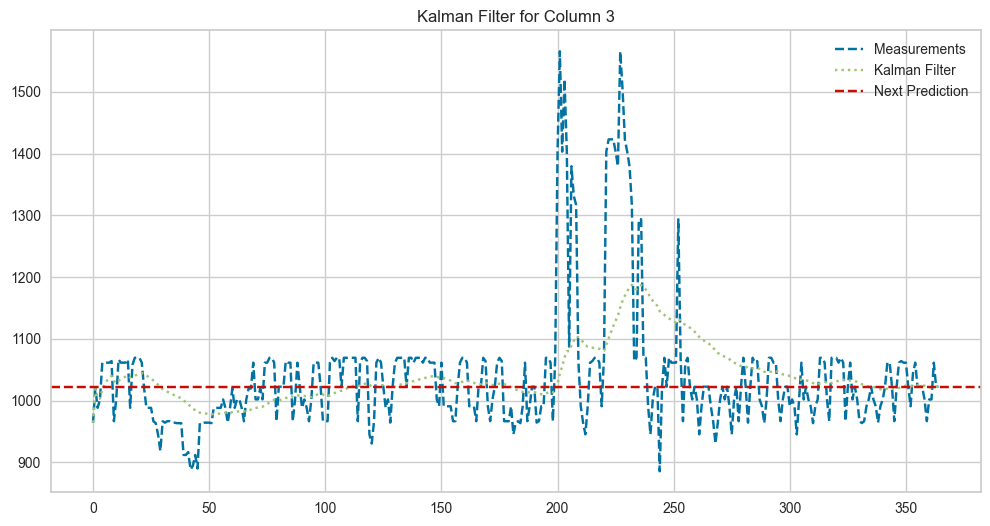

Dự báo điểm tiếp theo cho cột 4: 1022.4350275962843


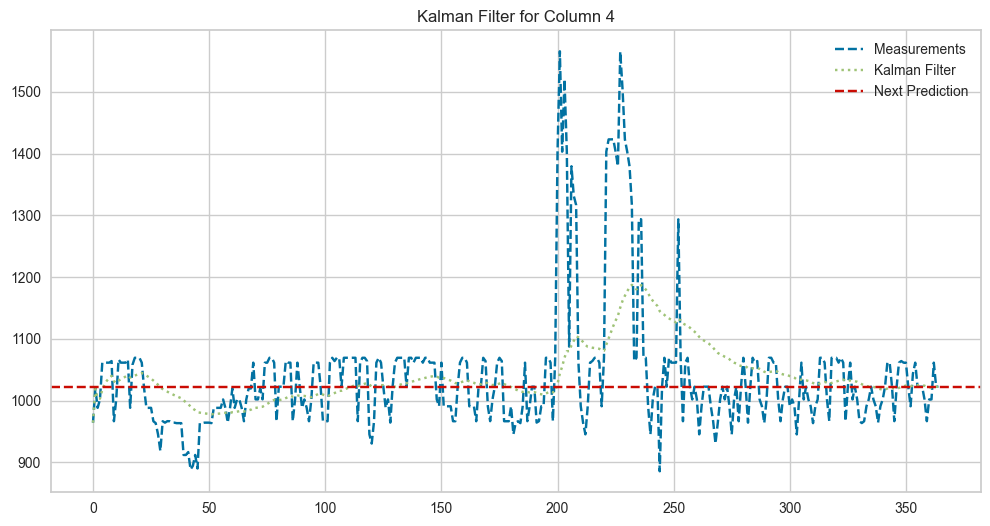

In [154]:
import numpy as np
import matplotlib.pyplot as plt

for col in ['2', '3', '4']:
    Q = 1e-5  # Hiệp phương sai của quá trình (process variance)
    R = 0.01  # Hiệp phương sai của đo lường (measurement variance)
    n_timesteps = len(time_series)
    xhat = np.zeros(n_timesteps)  # Ước lượng trạng thái ban đầu (a posteri estimate of x)
    P = np.zeros(n_timesteps)  # Ước lượng hiệp phương sai của lỗi (a posteri error estimate)
    xhatminus = np.zeros(n_timesteps)  # Trạng thái dự đoán (a priori estimate of x)
    Pminus = np.zeros(n_timesteps)  # Dự đoán hiệp phương sai của lỗi (a priori error estimate)
    K = np.zeros(n_timesteps)  # Kalman gain

    # Khởi tạo giá trị ban đầu
    xhat[0] = time_series[0]
    P[0] = 1.0

    # Kalman filter
    for k in range(1, n_timesteps):
        # Dự đoán (predict)
        xhatminus[k] = xhat[k-1]
        Pminus[k] = P[k-1] + Q

        # Cập nhật (update)
        K[k] = Pminus[k] / (Pminus[k] + R)
        xhat[k] = xhatminus[k] + K[k] * (time_series[k] - xhatminus[k])
        P[k] = (1 - K[k]) * Pminus[k]

    # Dự báo điểm tiếp theo
    xhat_next = xhat[-1]
    P_next = P[-1] + Q
    K_next = P_next / (P_next + R)
    prediction = xhat_next

    print(f'Dự báo điểm tiếp theo cho cột {col}: {prediction}')

    # Vẽ kết quả
    plt.figure(figsize=(12, 6))
    plt.plot(time_series, label='Measurements', linestyle='dashed')
    plt.plot(xhat, label='Kalman Filter', linestyle='dotted')
    plt.axhline(y=prediction, color='r', linestyle='--', label='Next Prediction')
    plt.legend()
    plt.title(f'Kalman Filter for Column {col}')
    plt.show()



# # Gaussian + PCA

In [146]:
feats = ['2', '3', '4']
transformer = PowerTransformer()
X=transformer.fit_transform(data[feats])

In [147]:
pca = PCA(n_components=3,random_state=1)
pca.fit(X)
PCA_ds = pd.DataFrame(pca.transform(data[feats]), columns=(["col1","col2","col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,365.0,-1758.897155,177.789364,-2647.063507,-1794.862928,-1729.087923,-1671.260026,-1497.607249
col2,365.0,138.273723,13.977934,117.734081,131.385758,135.931886,141.102775,208.098345
col3,365.0,-365.229050,36.917810,-549.654998,-372.698039,-359.040051,-347.032258,-310.973766


In [148]:
BGM = BayesianGaussianMixture(n_components=7,covariance_type='full',random_state=1,n_init=15)
# fit model and predict clusters
preds = BGM.fit_predict(X)

#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= preds

In [149]:
pp = BGM.predict_proba(X)  # Tính các xác suất của mỗi dự đoán
df_new = pd.DataFrame(X, columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(7)]] = pp  # Tạo các cột mới trong DataFrame chứa xác suất
df_new['preds'] = preds
df_new['predict_proba'] = np.max(pp, axis=1)
df_new['predict'] = np.argmax(pp, axis=1)

train_index = np.array([])

for n in range(7):
    n_inx = df_new[(df_new.preds == n) & (df_new.predict_proba > 0.68)].index
    if len(n_inx) > 0:  # Kiểm tra xem có mẫu nào thỏa mãn điều kiện không
        train_index = np.concatenate((train_index, n_inx))

# Chuyển train_index thành kiểu int
train_index = train_index.astype(int)


In [150]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb

# Định nghĩa train_index
train_index = df_new.index  # Điều chỉnh tùy theo cách bạn xác định train_index

X_new = df_new.loc[train_index][feats]
y = df_new.loc[train_index]['preds']

params_lgb = {
    'learning_rate': 0.06,
    'objective': 'multiclass',
    'boosting': 'gbdt',
    'n_jobs': -1,
    'verbosity': -1,
    'num_classes': 7
} 

model_list = []

# Đặt số lượng fold cho StratifiedKFold
gkf = StratifiedKFold(n_splits=11)

for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new, y)):   
    tr_dataset = lgb.Dataset(X_new.iloc[train_idx], y.iloc[train_idx], feature_name=feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx], y.iloc[valid_idx], feature_name=feats)
    
    model = lgb.train(params=params_lgb, 
                      train_set=tr_dataset, 
                      valid_sets=vl_dataset, 
                      num_boost_round=5000, 
                      callbacks=[lgb.early_stopping(stopping_rounds=300, verbose=False), 
                                 lgb.log_evaluation(period=200)])  
    
    model_list.append(model)


[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
[200]	valid_0's multi_logloss: 6.66134e-15
